In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import get_training_dataset

In [2]:
# Read csv file and import to df
df = get_training_dataset()
df

,typhoon_name,typhoon_year,grid_point_id,wind_speed,track_distance,rainfall_max_6h,rainfall_max_24h,total_houses,rwi,strong_roof_strong_wall,...,std_tri,mean_elev,coast_length,with_coast,urban,rural,water,total_pop,percent_houses_damaged,percent_houses_damaged_5years
0,DURIAN,2006,101,0.0,303.180555,0.122917,0.085417,31.000000,NaN,22.580645,...,2.699781,5.762712,3445.709753,1,0.00,0.000000,1.000000,0.000000,0.0,0.000000
1,DURIAN,2006,4475,0.0,638.027502,0.091667,0.027083,3.301020,-0.527000,2.639401,...,4.585088,12.799127,8602.645832,1,0.00,0.000000,1.000000,0.000000,0.0,0.000000
2,DURIAN,2006,4639,0.0,603.631997,0.535417,0.146354,12.103741,-0.283000,2.639401,...,1.527495,8.833333,5084.012925,1,0.00,0.010000,0.990000,197.339034,0.0,0.000000
3,DURIAN,2006,4640,0.0,614.675270,0.356250,0.101562,645.899660,-0.358889,2.639401,...,11.677657,17.530431,55607.865950,1,0.00,0.310000,0.690000,4970.477311,0.0,0.000000
4,DURIAN,2006,4641,0.0,625.720905,0.202083,0.057812,1071.731293,-0.462800,2.639401,...,17.074011,31.931338,35529.342507,1,0.00,0.770000,0.230000,12408.594656,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141253,MOLAVE,2020,20677,0.0,644.575831,2.543750,0.778646,4449.357133,0.508167,44.762048,...,18.012771,36.304688,21559.003490,1,0.08,0.080000,0.840000,17619.701390,0.0,0.000000
141254,MOLAVE,2020,20678,0.0,655.685233,2.558333,0.861458,1521.435795,-0.174100,44.762048,...,13.163042,65.687266,12591.742022,1,0.00,0.420000,0.580000,5623.069564,0.0,0.000000
141255,MOLAVE,2020,20679,0.0,666.794635,2.975000,0.949479,930.647069,-0.244286,25.078318,...,10.901755,37.414996,19740.596834,1,0.00,0.109091,0.890909,5912.671746,0.0,0.015207
141256,MOLAVE,2020,20680,0.0,677.904037,2.889583,1.083333,1800.666044,0.038000,16.796996,...,17.917650,105.812452,26363.303778,1,0.03,0.250000,0.720000,11254.164413,0.0,0.020806


In [3]:
# Fill NaNs with average estimated value of 'rwi'
df["rwi"].fillna(df["rwi"].mean(), inplace=True)

In [4]:
# Set any values >100% to 100%,
for i in range(len(df)):
    if df.loc[i, "percent_houses_damaged"] > 100:
        df.at[i, "percent_houses_damaged"] = float(100)

In [5]:
# Remove zeros from wind_speed
df = df[(df[["wind_speed"]] != 0).any(axis=1)]
df = df.drop(columns=["grid_point_id", "typhoon_year"])
df.head()

,typhoon_name,wind_speed,track_distance,rainfall_max_6h,rainfall_max_24h,total_houses,rwi,strong_roof_strong_wall,strong_roof_light_wall,strong_roof_salvage_wall,...,std_tri,mean_elev,coast_length,with_coast,urban,rural,water,total_pop,percent_houses_damaged,percent_houses_damaged_5years
138,DURIAN,12.460039,275.018491,0.670833,0.313021,0.479848,-0.213039,31.336503,29.117802,0.042261,...,34.629550,42.218750,5303.659490,1,0.00,0.00,1.00,0.000000,0.0,0.0
139,DURIAN,11.428974,297.027578,0.929167,0.343229,55.649739,0.206000,23.447758,23.591571,0.037516,...,25.475388,72.283154,61015.543599,1,0.00,0.14,0.86,276.871504,0.0,0.0
148,DURIAN,13.077471,262.598363,0.716667,0.424479,8.157414,-0.636000,31.336503,29.117802,0.042261,...,54.353996,102.215198,66707.438070,1,0.00,0.11,0.89,448.539453,0.0,0.0
149,DURIAN,12.511864,273.639330,0.568750,0.336979,88.292015,-0.227500,31.336503,29.117802,0.042261,...,31.814048,58.988877,53841.050168,1,0.00,0.12,0.88,2101.708435,0.0,0.0
150,DURIAN,11.977511,284.680297,0.589583,0.290625,962.766739,-0.299667,23.546053,23.660429,0.037576,...,25.976413,111.386527,87378.257957,1,0.07,0.46,0.47,11632.726327,0.0,0.0


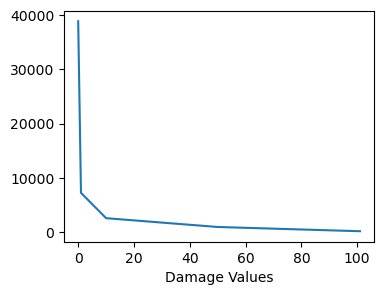

In [7]:
bins2 = [0, 0.00009, 1, 10, 50, 101]
samples_per_bin2, binsP2 = np.histogram(df['percent_houses_damaged'], bins=bins2)
samples_per_bin2, binsP2 = np.histogram(df["percent_houses_damaged"], bins=bins2)
plt.figure(figsize=(4, 3))
plt.xlabel("Damage Values")
plt.plot(binsP2[1:],samples_per_bin2)

In [8]:
print(samples_per_bin2)
print(binsP2)

[38901  7232  2552   925   144]
[0.00e+00 9.00e-05 1.00e+00 1.00e+01 5.00e+01 1.01e+02]


In [9]:
df["percent_houses_damaged"].value_counts(bins=binsP2)

(-0.001, 9e-05]    38901
(9e-05, 1.0]        7232
(1.0, 10.0]         2552
(10.0, 50.0]         925
(50.0, 101.0]        144
Name: percent_houses_damaged, dtype: int64

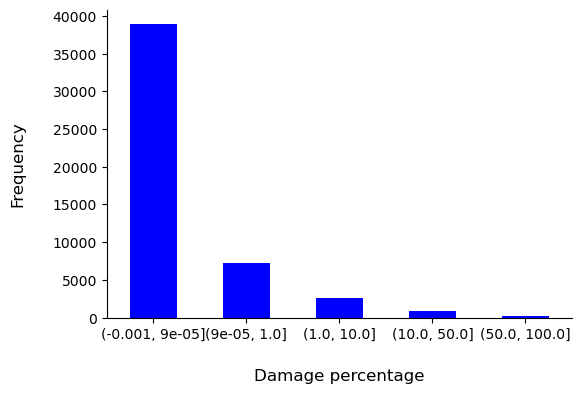

In [10]:
#Count numbers in each bin and create a bar plot

check = pd.cut(df['percent_houses_damaged'], bins=[0, 0.00009, 1, 10, 50, 100], include_lowest=True)
ax = check.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
    

# Set x-axis label
ax.set_xlabel("Damage percentage", labelpad=20, size=12)

# Set y-axis label
ax.set_ylabel("Frequency", labelpad=20, size=12)


fig = ax.get_figure()
fig.savefig('figures/bin_of_damage_grid.pdf')

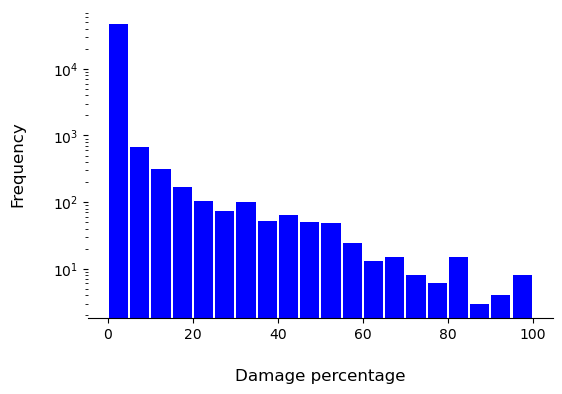

In [11]:
from matplotlib.ticker import StrMethodFormatter
ax = df.hist(column='percent_houses_damaged', bins=20, grid=False, figsize=(6,4), color='b', zorder=2, rwidth=0.9, 
            log=True)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    #x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    #vals = x.get_yticks()
    #for tick in vals:
        #x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set title
    x.set_title("", size=10, color='b')

    # Set x-axis label
    x.set_xlabel("Damage percentage" , labelpad=20, size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, size=12)

    # Format y-axis label
    #x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    
fig = ax[0].get_figure()
fig.savefig('figures/hist_of_damage_grid.pdf')


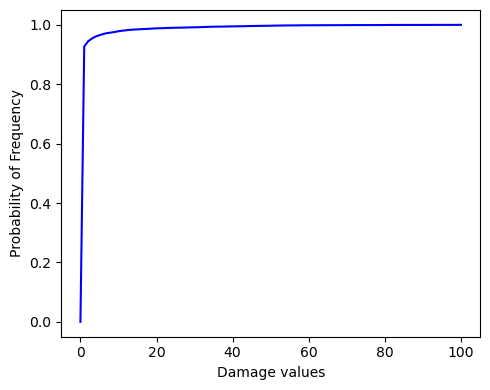

In [13]:
plt.rcParams["figure.figsize"] = [5, 4]
plt.rcParams["figure.autolayout"] = True

#bins2 = [0, 0.00009, 1, 10, 50, 101]
samples_per_bin2, binsP2 = np.histogram(df["percent_houses_damaged"], bins=100)
pdf = samples_per_bin2 / sum(samples_per_bin2)
cdf = np.insert(np.cumsum(pdf), 0, 0)
plt.plot(binsP2, cdf, label="CDF", color='b')
#plt.legend()

plt.xlabel("Damage values")
plt.ylabel("Probability of Frequency")
plt.savefig("figures/cdf_of_damage_grid.pdf", bbox_inches='tight')